**Use of simple Convolution Neural Network for Mnist and Cifar Dataset classification**

In [ ]:
%tensorflow_version 2.x  

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models


5


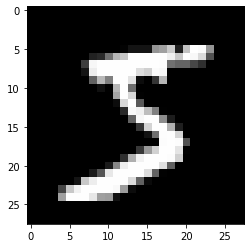

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(10000)

test_img = tf.data.Dataset.from_tensor_slices(test_images)

use of 16 , 5x5 filters in the first layer  
use of 32 , 5x5 filters in the second layer

The pooling operation provides a form of translation invariance which is added between convolution layers.  DenseLayer at the final layer for classification.

Use of SparseCategorical Entropy as a loss function


In [ ]:
layers = [tf.keras.layers.Conv2D(16,(5,5),activation='relu', input_shape=(28, 28, 1), padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.Conv2D(32,(5,5),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(10)]
model = tf.keras.Sequential(layers)

training_steps = 1000

opt = tf.optimizers.Adam()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
for step, (img_batch, lbl_batch) in enumerate(data):
  if step > training_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model(img_batch)
    xent = loss_fn(lbl_batch, logits)
  
  varis = model.trainable_variables
  grads = tape.gradient(xent, varis)
  opt.apply_gradients(zip(grads, varis))

  train_acc_metric(lbl_batch, logits)
  if not step % 100:
    print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
    train_acc_metric.reset_states()


Loss: 2.3491597175598145 Accuracy: 0.1171875
Loss: 0.2701629400253296 Accuracy: 0.7966406345367432
Loss: 0.18356896936893463 Accuracy: 0.9396874904632568
Loss: 0.2536381185054779 Accuracy: 0.9571874737739563
Loss: 0.08795301616191864 Accuracy: 0.9664843678474426
Loss: 0.03558479994535446 Accuracy: 0.9732925891876221
Loss: 0.02503000944852829 Accuracy: 0.9753124713897705
Loss: 0.037402618676424026 Accuracy: 0.9775781035423279
Loss: 0.04733660817146301 Accuracy: 0.9775000214576721
Loss: 0.16438370943069458 Accuracy: 0.9802343845367432
Loss: 0.06926880031824112 Accuracy: 0.9830043911933899


In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9843999743461609


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15690     
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
__________________________________________________

conv2d_7  -  16  filters


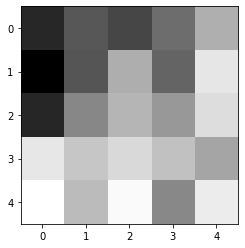

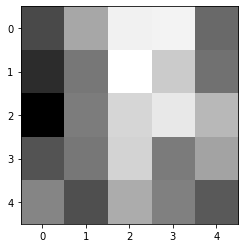

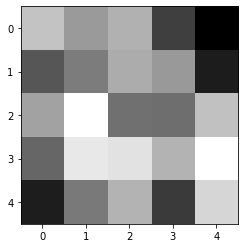

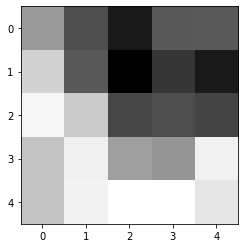

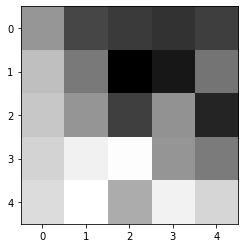

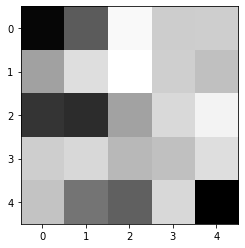

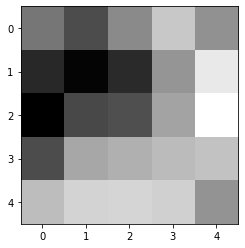

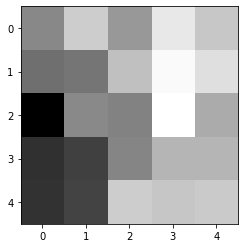

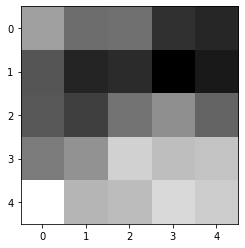

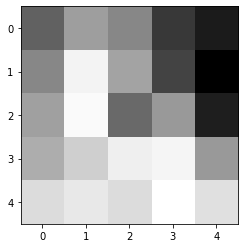

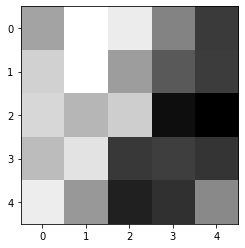

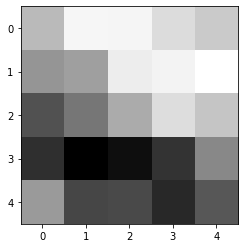

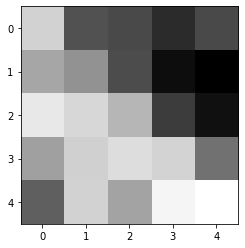

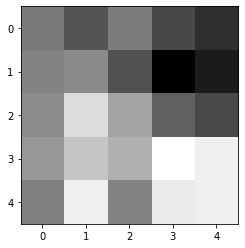

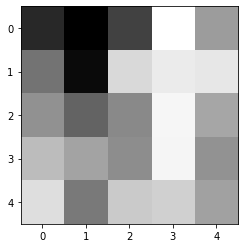

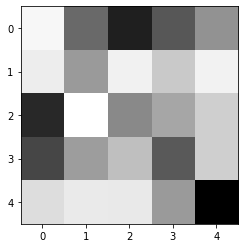

conv2d_8  -  32  filters


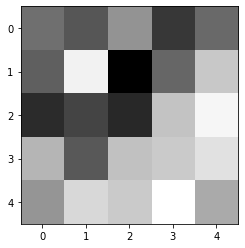

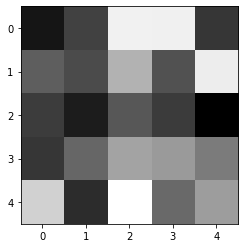

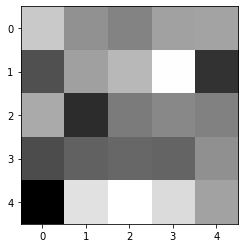

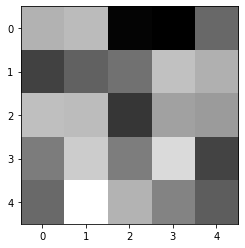

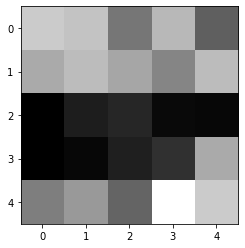

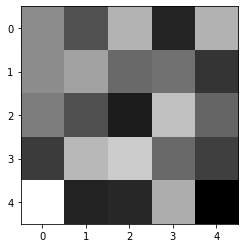

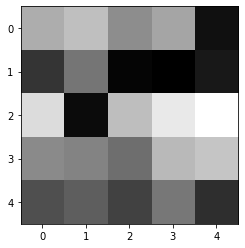

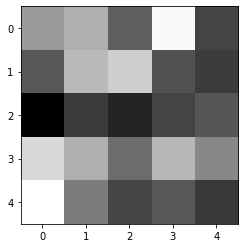

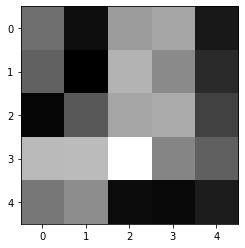

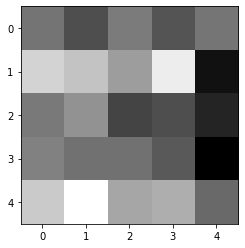

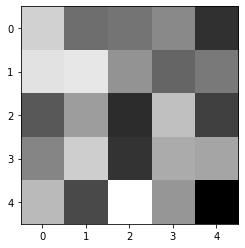

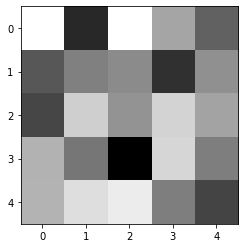

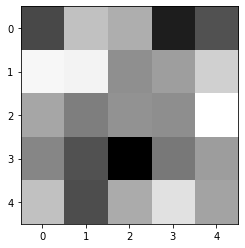

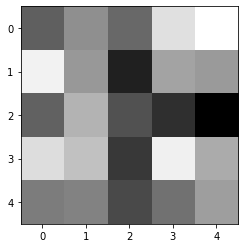

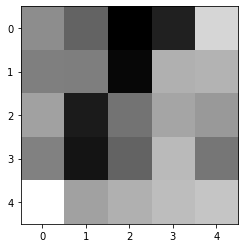

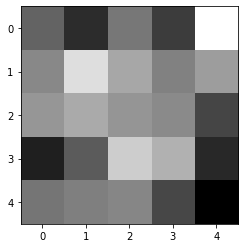

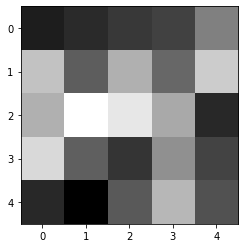

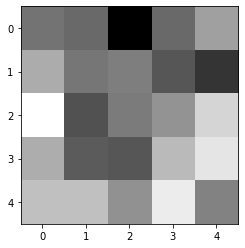

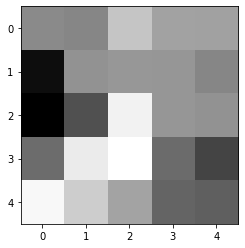

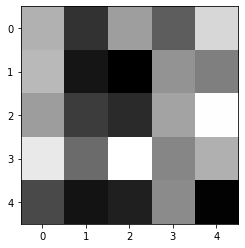

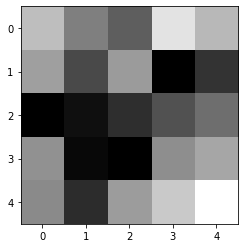

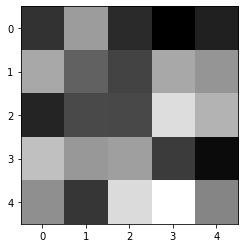

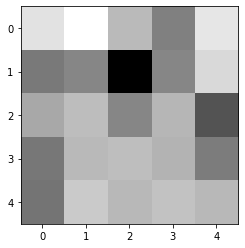

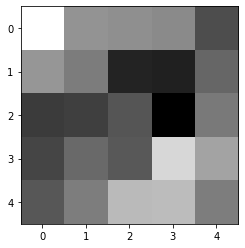

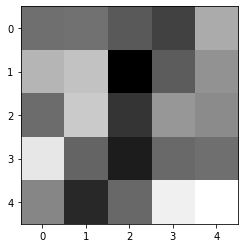

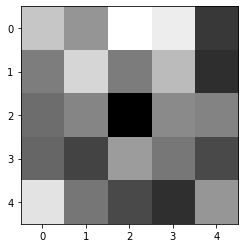

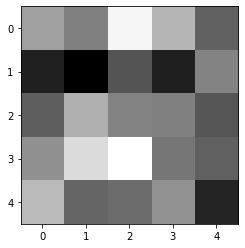

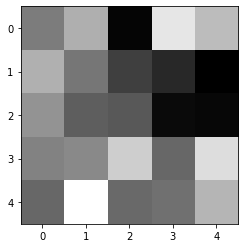

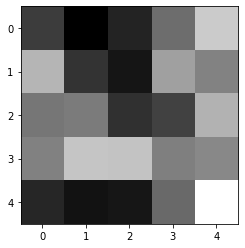

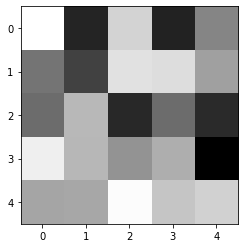

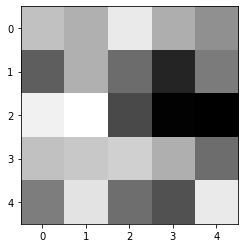

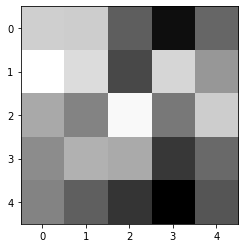

In [ ]:

ix = 1
conv_layers = [layer for layer in model.layers if 'conv' in layer.name]
for layer in conv_layers:
  filters, biases = layer.get_weights()
  
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)
  
  h,w,c,f = filters.shape
  print(layer.name,' - ',f,' filters')
  for i in range(f):
    f = filters[:,:,:,i]
    plt.imshow(f[:,:,0], cmap='gray')
    plt.show()
    

    ix += 1


In [ ]:
len(model.layers[0].get_weights()[0][0][0])

1




Using CIFAR10: For Classification using CNN


[6]


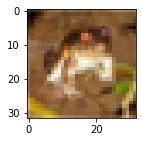

In [ ]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

print(train_labels[0])
plt.figure(figsize=(2,2))
plt.imshow(train_images[0], cmap="Greys_r")

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=30000).batch(128).repeat(3)

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(10000)

# layers = [tf.keras.layers.Conv2D(32,(5,5),activation='relu', input_shape=(32, 32, 3), padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1), kernel_regularizer=tf.keras.regularizers.l2(0.000001)),
#           tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
#           tf.keras.layers.Conv2D(16,(5,5),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1), kernel_regularizer=tf.keras.regularizers.l2(0.000001)),
#           tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
#           tf.keras.layers.Flatten(),
#           tf.keras.layers.Dense(10)]

layers = [tf.keras.layers.Conv2D(64,(5,5),activation='relu', input_shape=(32, 32, 3), padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(128,(5,5),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(256,(3,3),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(512,(3,3),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),

          
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dense(10),
          
          ]

model = tf.keras.Sequential(layers)

training_steps = 1000

opt = tf.optimizers.Adam()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
for step, (img_batch, lbl_batch) in enumerate(data):
  if step > 60000:
    break
  
  with tf.GradientTape() as tape:
    logits = model(img_batch)
    xent = loss_fn(lbl_batch, logits)
  
  varis = model.trainable_variables
  grads = tape.gradient(xent, varis)
  opt.apply_gradients(zip(grads, varis))

  train_acc_metric(lbl_batch, logits)
  if not step % 100:
    print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
    train_acc_metric.reset_states()

Loss: 0.1446533352136612 Accuracy: 0.8687607645988464
Loss: 0.23650704324245453 Accuracy: 0.9354687333106995
Loss: 0.16949406266212463 Accuracy: 0.9267968535423279
Loss: 0.2829596996307373 Accuracy: 0.9085156321525574
Loss: 0.18314021825790405 Accuracy: 0.9042503237724304
Loss: 0.11341311037540436 Accuracy: 0.9534375071525574
Loss: 0.16610214114189148 Accuracy: 0.9449999928474426
Loss: 0.19846414029598236 Accuracy: 0.9293749928474426
Loss: 0.1305902749300003 Accuracy: 0.937656819820404
Loss: 0.09241507202386856 Accuracy: 0.9632812738418579
Loss: 0.16231754422187805 Accuracy: 0.9560156464576721
Loss: 0.22635230422019958 Accuracy: 0.9474999904632568


In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7196999788284302


**Code for Visualing the layers for an input to check the activation**

In [ ]:
def visualise(img):
  plt.imshow(img, cmap=plt.cm.binary)

  img = img_to_array(img)
  img = expand_dims(img, axis=0)
  print(img.shape)

  layer_outputs = [layer.output for layer in model.layers[:2]] 
  # Extracts the outputs of the top 12 layers
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
  activations = activation_model.predict(img) # Returns a list of five Numpy arrays: one array per layer activation

  layer_names = []
  for layer in model.layers:
      layer_names.append(layer.name)
    
  images_per_row = 8
  for layer_name, layer_activation in zip(layer_names, activations): 
      n_features = layer_activation.shape[-1] # Number of features in the feature map
      size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
      n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
          for row in range(images_per_row):
              channel_image = layer_activation[0,:, :,col * images_per_row + row]
            # channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            # channel_image /= channel_image.std()
            # channel_image *= 64
            # channel_image += 128
            # channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)

      plt.grid(False)
      plt.imshow(display_grid, cmap='viridis')
    # plt.imshow(display_grid, aspect='auto', cmap='viridis')


(1, 32, 32, 3)


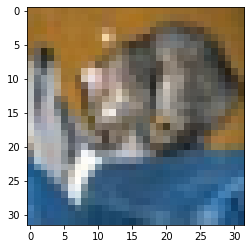

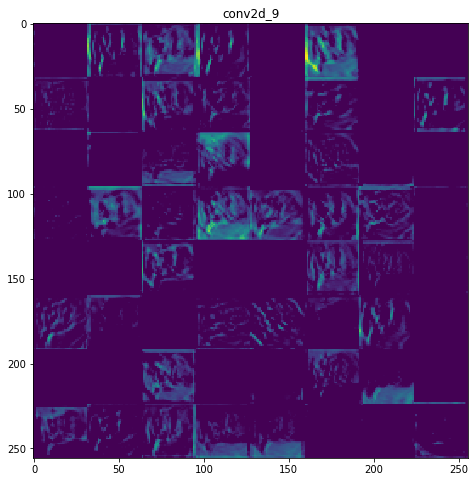

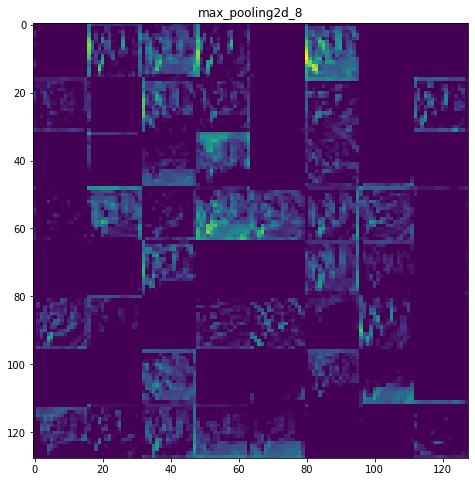

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

visualise(test_images[0])

